# Students' performance on tests

## Business Understanding

In this notebook, based on data about students' performance on tests, I will try to answer 3 questions:
1. What are the subjects that certain gender is more successful in terms grades gained?
2. Is there any difference between students that have various types of lunch?
3. Does the completion of test preparation course result in better grades?

## Data Understanding

The data will be loaded and checked whether it needs cleaning.

### Access

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [4]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [5]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [6]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [7]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [8]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [9]:
# cheking null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Data Preparation

Here, data will be prepared for further analysis.

### Clean 
Replacing spaces with underscores in column names

In [10]:
df = df.rename(columns={"parental level of education": "parental_level_of_education", \
                   "test preparation course": "test_preparation_course", \
                   "math score": "math_score", "reading score": "reading_score", "writing score": "writing_score"})

In [11]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Visualize

Grouped by gender and parental level of education, looking at the average math scores

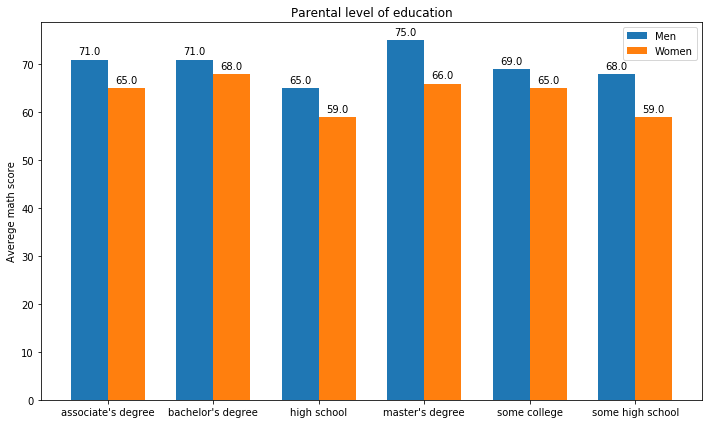

In [12]:
labels = ["associate's degree", "bachelor's degree", "high school", "master's degree", "some college","some high school"]

male = round(df[df['gender'] == 'male'].groupby(['gender', 'parental_level_of_education']).mean()['math_score'])
female = round(df[df['gender'] == 'female'].groupby(['gender', 'parental_level_of_education']).mean()['math_score'])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (10, 6))
rects1 = ax.bar(x - width / 2, male, width, label = 'Men')
rects2 = ax.bar(x + width / 2, female, width, label = 'Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Averege math score')
ax.set_title('Parental level of education')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy = (rect.get_x() + rect.get_width() / 2, height),
                    xytext = (0, 3),  # 3 points vertical offset
                    textcoords = "offset points",
                    ha = 'center', va = 'bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


Grouped by gender and parental level of education, looking at the average reading scores



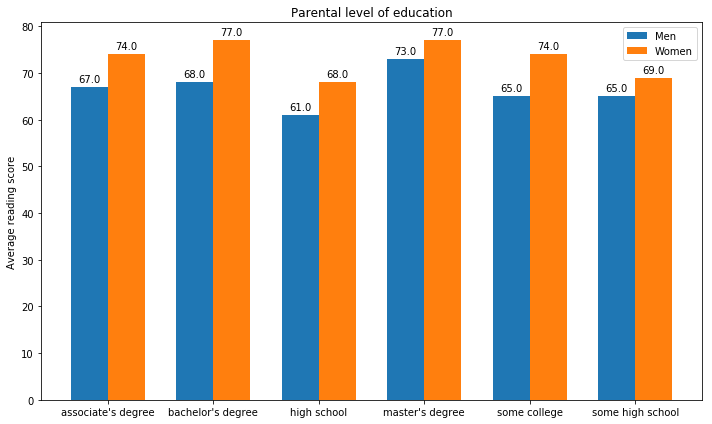

In [13]:
labels = ["associate's degree", "bachelor's degree", "high school", "master's degree", "some college","some high school"]

male = round(df[df['gender'] == 'male'].groupby(['gender', 'parental_level_of_education']).mean()['reading_score'])
female = round(df[df['gender'] == 'female'].groupby(['gender', 'parental_level_of_education']).mean()['reading_score'])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (10, 6))
rects1 = ax.bar(x - width / 2, male, width, label = 'Men')
rects2 = ax.bar(x + width / 2, female, width, label = 'Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average reading score')
ax.set_title('Parental level of education')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


Grouped by gender and parental level of education, looking at the average writing scores



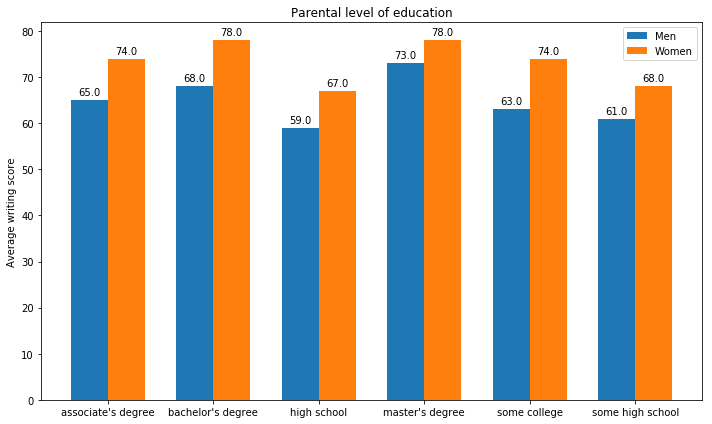

In [14]:
labels = ["associate's degree", "bachelor's degree", "high school", "master's degree", "some college","some high school"]

male = round(df[df['gender'] == 'male'].groupby(['gender', 'parental_level_of_education']).mean()['writing_score'])
female = round(df[df['gender'] == 'female'].groupby(['gender', 'parental_level_of_education']).mean()['writing_score'])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (10, 6))
rects1 = ax.bar(x - width / 2, male, width, label = 'Men')
rects2 = ax.bar(x + width / 2, female, width, label = 'Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average writing score')
ax.set_title('Parental level of education')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Results 

## What are the subjects that certain gender is more successful in terms grades gained? 

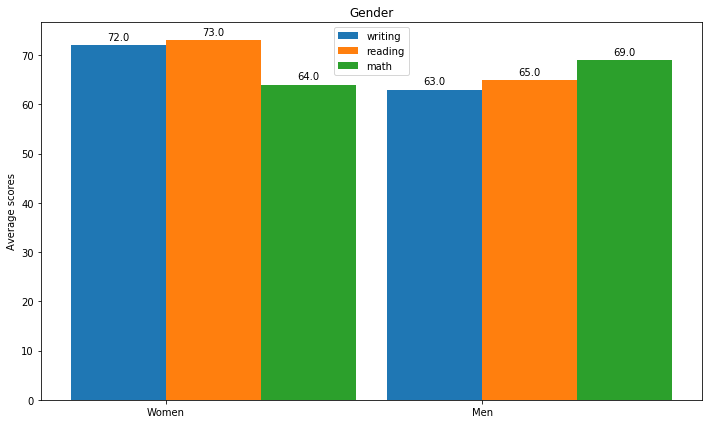

In [15]:
labels = ["Women", "Men"]

writing = round(df.groupby(['gender']).mean()['writing_score'])
reading = round(df.groupby(['gender']).mean()['reading_score'])
math = round(df.groupby(['gender']).mean()['math_score'])

x = np.arange(len(labels))  # the label locations
width = 0.30  # the width of the bars

fig, ax = plt.subplots(figsize = (10, 6))
rects1 = ax.bar(x - width / 2, writing, width, label = 'writing')
rects2 = ax.bar(x + width / 2, reading, width, label = 'reading')
rects3 = ax.bar(x + 1.5 * width , math, width, label = 'math')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average scores')
ax.set_title('Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

### Although male students have higher grades in math, female ones outperform them in both writing and reading courses.

## Is there any difference between students that have various types of lunch? 

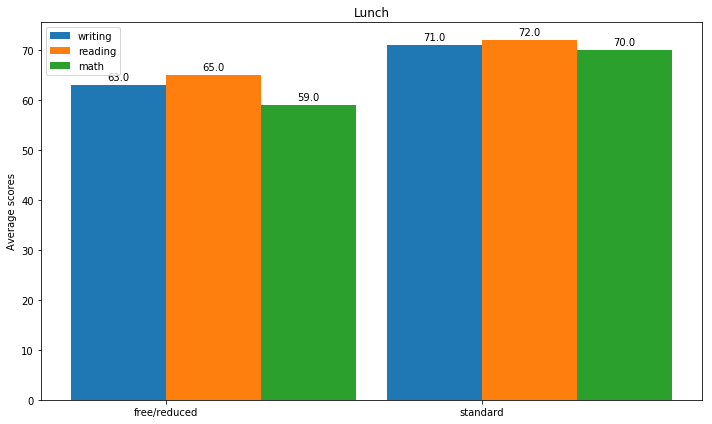

In [16]:
labels = ["free/reduced", "standard"]

writing = round(df.groupby(['lunch']).mean()['writing_score'])
reading = round(df.groupby(['lunch']).mean()['reading_score'])
math = round(df.groupby(['lunch']).mean()['math_score'])

x = np.arange(len(labels))  # the label locations
width = 0.30  # the width of the bars

fig, ax = plt.subplots(figsize = (10, 6))
rects1 = ax.bar(x - width / 2, writing, width, label = 'writing')
rects2 = ax.bar(x + width / 2, reading, width, label = 'reading')
rects3 = ax.bar(x + 1.5 * width , math, width, label = 'math')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average scores')
ax.set_title('Lunch')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

### We can see that students who have standard lunch rather than free/reduced gained higher grades on average no matter the subject.

## Does the completion of test preparation course result in better grades?

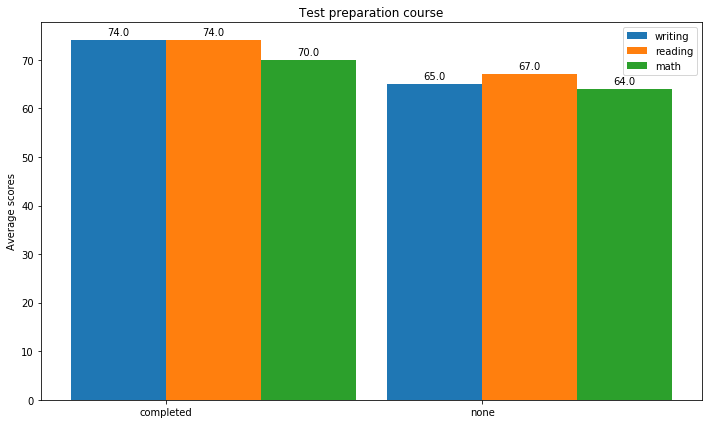

In [18]:
labels = ["completed", "none"]

writing = round(df.groupby(['test_preparation_course']).mean()['writing_score'])
reading = round(df.groupby(['test_preparation_course']).mean()['reading_score'])
math = round(df.groupby(['test_preparation_course']).mean()['math_score'])

x = np.arange(len(labels))  # the label locations
width = 0.30  # the width of the bars

fig, ax = plt.subplots(figsize = (10, 6))
rects1 = ax.bar(x - width / 2, writing, width, label = 'writing')
rects2 = ax.bar(x + width / 2, reading, width, label = 'reading')
rects3 = ax.bar(x + 1.5 * width , math, width, label = 'math')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average scores')
ax.set_title('Test preparation course')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

### We can see that average scores of students who have completed the preparation course in all subjects given in the data are better than those of whom that have not completed. 